# <center>Natural Surface Dispersion</center>

<table style="border: hidden">
  <tr style="border: hidden">
    <td style="border: hidden; text-align: right">Date:
    <td> October 2016
  <tr style="border: hidden">
    <td style="border: hidden; text-align: right">Authored by:
    <td>Bill Lehr
  <tr style="border: hidden">
    <td style="border: hidden; text-align: right">Transcribed by:
    <td>James Makela
</table>

## <u>Calculating the Significant Height and Breaking Wave Fraction</u>

Adios 3 considers only fully developed seas.  This means that model assumes that if the wind blows steadily for a long time over a large area, then the waves will eventually reach a point of equilibrium with the wind.  Wind is modeled by the wind at 10m elevation above the water surface, $U_{10}$.

Waves are modeled by the significant wave height, height of the highest one third of the waves.  According to the Shore Protection Manual (1984), height and period of the significant wave can be calculated from the wind speed and, optionally, fetch:

$$
\begin{align}
F &= \text{fetch in meters} \cr
U_A &= \text{wind drag} \cr
&= 0.71 \cdot U_{10}^{1.23} \cr
\end{align}
$$

$$
\left.
\begin{aligned}
T_{wp} &= 0.83 \cdot U_A \\
H_w &= (2.48 \cdot 10^{-2}) \cdot U_A^2 \\
\end{aligned}
\right\}
\text{for unlimited fetch case}
$$

In [8]:
import numpy as np
from pylab import *
%matplotlib inline

# graph the unlimited fetch wave height here

$$
\left.
\begin{aligned}
T_{wp} &= (6.24 \cdot 10^{-2}) \cdot (U_A \cdot F)^{1/3} \\
H_w &= (5.11 \cdot 10^{-4}) \cdot U_A \cdot F^{1/2} \\
\end{aligned}
\right\}
\text{for fetch limited case}
$$

provided that $H_w$ is less than the unlimited fetch case.

The wave height formulas are not accurate for very high seas.  The Shoreline Protection Manual Nomogram (Figure 3-23) has an upper limit of 20 m for significant wave height.  The preceding graph indicates that this corresponds to approximately a $U_{10} \approx 20 m/s$, or approximately 40 knots.  Adios3 includes the following restrictions for purposes of dispersion calculation:

$$
\begin{align}
H_w &= (H_w)_{\bot 0}^{\top 20} \qquad \qquad \qquad \qquad \qquad \boldsymbol{(Eq. 1.1)}\cr
U_{10} &= (U_{10})_{\bot 0}^{\top 20} \cr
\end{align}
$$

Not every wave breaks, only a small fraction of them.  This fraction, $f_{bw}$, is computed from wind speed with highly scattered results when compared to measurement (Ding and Farmer, 1994).  Different researchers have different results for these fractions (Lehr, and Simecek Beatty, 2000, Zhao and Toba, 2001).  In Adios2, breaking wave fraction is computed as an integer power of the wind speed.

$$
\begin{align}
&if \, U_{10} < 3.7 \qquad \qquad then \,\, f_{bw} = 0 \cr
&if \, 3.7 \leq U_{10} \leq 10.18 \quad then \,\, f_{bw} = 3.18 \cdot 10^{-5} (U_{10} - 3.7)^3 \cr
&else \qquad \qquad \qquad \qquad \quad f_{bw} = (4.82 \cdot 10^{-6} ( U_{10} + 1.98)^3)^{\top 1}
\end{align}
$$

Adios3 uses instead the suggestions of Zhao and Toba by defining a dimensionless breaking wave parameter, $R_{bw}$.  This parameter is based on a calculated drag coefficient $(C_D)$ and the peak angular frequency for the Pierson-Moskowitz spectrum $(\omega_{pm})$. 

First we need to calculate $\omega_{pm}$. 

$$
\begin{align}
\omega_{p} &= \text{peak angular frequency for the Pierson-Moskowitz spectrum } (1 / s) \cr
&= { 0.86 \over g \cdot U_{10} } \cr
\end{align}
$$

Next we need to calculate $C_D$. 

$$
\begin{align}
C_D &= \text{drag coefficient (dimensionless, but slight function of wind speed)} \cr
\cr
if \, &U_{10} > 2.4 \qquad \qquad then \,\, C_D = (0.0008 + 0.000065 \cdot U_{10}) \cr
if \, &U_{10} = 2.4 \qquad \qquad then \,\, C_D = (0.0008 + 0.000065 \cdot 2.4) = 0.000956 \cr
if \, &U_{10} < 2.4 \qquad \qquad then \,\, C_D = \left({0.000956 \over 2.4} \cdot U_{10} \right)_{\bot 0} \cr
\end{align}
$$

<i>(Note: when our wind speed is below 2.4 m/s, we deviate from Z&T and simply perform a linear interpolation from the point at $U_{10} = 2.4$ to zero)</i>

And now we can get our breaking wave parameter: 

$$
\begin{align}
v_{air} &= \text{kinematic viscosity of air } (m^2 /s) \cr
&= 1.5 \cdot 10^{-5} \cr
\cr
R_{bw} &= {C_D \cdot U_{10}^2 \over v_{air} \cdot \omega_{p} }
\qquad \qquad \qquad \qquad \qquad \boldsymbol{(Eq. 1.2)}\cr
\end{align}
$$

<center><b><i>-- Begin JamesM Comments --</i></b></center>

Ok, I am not sure that we have the right formula for $\omega_{p}$, so let's try to work it out.<br>
Working from this reference: http://www.codecogs.com/library/engineering/fluid_mechanics/waves/spectra/pierson_moskowitz.php#function11

$$
\begin{align}
\beta &= \text{a numerical constant} \cr
&= 0.74 \cr
g &= \text{gravitational acceleration constant} \cr
&= 9.80665 (m/s) \cr
\cr
U_z, U_w &= \text{wind speed at different relative elevations} \cr
U_z &= U_w \cdot (z/w)^{1/7} \cr
U_{19.5} &= U_{10} \cdot \left({19.5 \over 10} \right)^{1/7} \cr
\cr
\omega_p &= \left( \frac{4 \cdot \beta}{5} \right)^{1/4} \cdot \frac{g}{U_{19.5}} \cr
&= \left( \frac{4 \cdot \beta}{5} \right)^{1/4} \cdot \frac{g}{ U_{10} \cdot \left({19.5 \over 10} \right)^{1/7} } \cr
&= \left( \left( \frac{4 \cdot \beta}{5} \right)^{1/4} \over \left({19.5 \over 10} \right)^{1/7} \right) \cdot
\frac{g}{ U_{10} } \cr
&= 0.797 \cdot \frac{g}{ U_{10} } \cr
\end{align}
$$

<u>Let's confirm this with Bill.</u>

<center><b><i>-- End JamesM Comments --</i></b></center>

According to Zhao & Toba, using this Reynolds-like dimensionless number rather than an integer power of the wind speed yields less scatter when applied to several different whitecap data sets.

Referencing Zhao & Toba eq. 32:

$$
\begin{align}
f_{bw} &= 3.88 \cdot 10^{-5} \cdot R_{bw}^{1.09}
\qquad \qquad \qquad \qquad \qquad \boldsymbol{(Eq. 1.3)}\cr
\end{align}
$$

Note that Zhao & Toba scale their drag coefficient to 5 knots $(\approx 2.4 m/s)$ instead of the Adios2 cutoff of $3.7 m/s$.  However, Parsa et al (2016) report dispersed oil under non-breaking waves.  To account for this reduced, but non-zero, dispersion, Adios3 reduces $C_D$ linearly with wind speed for winds less than $2.4 m/s$.

The average time period between breaking waves is given by:

$$
\begin{align}
\text{if } f_{bw} > 0 \qquad \qquad \text{then } T_{bw} &= T_{wp} / f_{bw} \cr
\end{align}
$$

## <u>Calculating Energy Dissipation</u>

The dynamic coupling between the atmosphere and the ocean is through wind wave generation with only a small fraction (Melville, 1994) used to propagate the surface waves.  The remaining energy is dissipated into a surface mixing zone, $\delta_{mix}$.<br>
Rapp & Melville (1990) estimated this surface zone as between a half to one wave height.  Delvigne & Sweeney (DS, 1988), consistent with the findings of Li and Garrett (1998) a decade later, estimated a deeper penetration.

$$
\begin{align}
\delta_{mix} &= 1.5 H_w
\qquad \qquad \qquad \qquad \qquad \boldsymbol{(Adios2)} \cr
\end{align}
$$

This value is used in Adios2 and most other oil weathering models.  However, it is not universally accepted by physical oceanographers (Craig & Banner, 1994; Sutherland et al. 2013; Terrey et al. 1996; Wang & liao 2016).<br>
Based on recent empirical studies, there is a shallow surface mixing zone of about 0.4 times the significant wave where the dissipation rate is vertically constant, followed by a deeper zone where the rate decreases rapidly.  However, oil droplets are dispersed deeper than $0.4 H_w$ (Nissanka & Yapa, 2016).<br>
Adios3 uses the larger choice of penetration depth from the recent studies and keeps the energy dissipation rate constant.

$$
\begin{align}
\delta_{mix} &= H_w
\qquad \qquad \qquad \qquad \qquad \boldsymbol{(1.4)} \cr
\end{align}
$$

While vertically constant over a depth of approximately a wave height, the dissipation rate is not horizontally constant, with different values between crest and trough (Gemmrich & Farmer, 2004).

Adios2, using DS, estimated that the energy dissipation per unit water surface area as a fraction of the potential energy was:

$$
\begin{align}
E_{bw} &= 0.0034 \cdot \rho_w \cdot H_w^2
\qquad \qquad \qquad \qquad \qquad \boldsymbol{(Adios2)} \cr
\end{align}
$$

An often more useful term is energy dissipation rate per unit mass, $\varepsilon$, which is measured in units of velocity squared per second $(m^2/s^3)$<br>
To define this and other related terms, Adios3 uses the approach of Terrey et al. (1996, Eqs. 5, 6, 7, 9, and Fig. 6), the results of Umlauf & Burchard (2003), Taylor & Yelland (2001) and recent research by Wang & Liao (2016, Fig. 10a).

First, Umlauf & Burchard define $c_{ub}$ which is a dimensionless empirical coefficient to correct for non-Law-of-the-Wall results. <i>(Note: I would love some elaboration here)</i>

$$
\begin{align}
c_{ub} &= \text{empirical correction coefficient (U&B 2003)} \cr
&= 100 \cr
\cr
c_p &= \text{peak wave speed for Pierson-Moskowitz spectrum} \cr
&= 1.17 \cdot U_{10} \cr
\cr
\omega_p &= \text{peak angular frequency for Pierson-Moskowitz spectrum} \cr
&= 0.85 \cdot \frac{g}{U_{10}} \cr
\cr
z_0 &= \text{surface roughness } (m) \, \text{(T&Y 2001)} \cr
&= 1200 \cdot H_w \cdot \left( \frac{H_w \cdot \omega_p}{c_p} \right)^{4.5} \cr
\cr
u_{*a} &= \text{air friction velocity } (m/s) \cr
&= 0.4 \cdot \frac{U_{10}}{ln \left(\frac{10}{z_0} \right)} \cr
\cr
u_{*c} &= \text{water friction velocity } (m/s) \cr
&= \left( \frac{\rho_{air}}{\rho_w} \right)^{1/2} \cdot u_{*a} \cr
&\approx 0.03 \cdot u_{*a} \cr
\end{align}
$$

And finally, after all the meta-calculations have been done, we can now calculate the energy dissipation rate per unit mass:

$$
\begin{align}
\varepsilon &= \text{energy dissipation rate per unit mass } (m^2/s^3) \cr
\varepsilon &= C_{ub} \cdot \frac{u_{*c}^3}{H_w}
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \boldsymbol{(1.5)} \cr
\cr
&\text{formula here???} \qquad \qquad \qquad \qquad \qquad \qquad \,\,\,\, \boldsymbol{(1.6)} \cr
\end{align}
$$

<center><b><i>-- Begin JamesM Comments --</i></b></center>

- I have already commented on $\omega_{p}$, but still, <u>Let's confirm this with Bill.</u>
- Surface roughness: This is new to me, and I need to research T&Y a bit, but units in meters?  This seems counterintuitive.  I would expect something like a dimensionless ratio weighed against a perfectly smooth surface.

<center><b><i>--  End JamesM Comments --</i></b></center>

The last equation assumes a constant value of $\varepsilon$ through depth $\delta_{mix}$, ignoring rapidly decreasing value for greater depths.

### <center>If the User Enters Wave Height</center>

The Adios3 user has the option to override the default wave height.  If they do, then the formula for energy dissipation will be:

$$
\begin{align}
\varepsilon &= \frac{0.0355 \cdot H_w^{0.215}}
{ \left( ln \left( \frac{6.31}{H_w^{1.45}} \right) \right)^3 }
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \boldsymbol{(1.7)} \cr
\end{align}
$$

In [31]:
def dissipation_rate_with_wave_height(height):
    H_w = height
    return (0.0355 * H_w ** 0.215 /
            np.log(6.31 / H_w ** 1.45) ** 3.0)


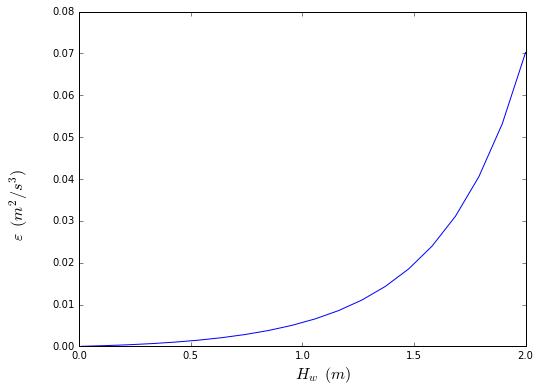

In [32]:
plt.figure(figsize=(8, 6))  # make the drawing area a bit bigger

ax1 = plt.subplot(111)

wave_heights = np.linspace(0.01, 2.0, 20)

x = wave_heights
y = dissipation_rate_with_wave_height(wave_heights)

ax1.plot(x, y, linewidth=1)

ax1.figure.text(0.5, 0.05, r'$H_w \,\,\, (m)$', fontsize=16)
ax1.figure.text(0.0, 0.5, r'$\varepsilon \,\,\, ({m^2 / s^3})$', fontsize=16, rotation=90)

show()

## <u>Characteristic Speed Length</u>

Adios3 assumes that internal stresses on the droplets will rapidly break them until the average size is reached in the Kolmogorov viscous subrange.  Boxall et al. (2011) define a Kolmogorov scale velocity at the viscous subrange as:

$$
\begin{align}
v_w &= \text{kinematic viscosity of water} \cr
&= 1 \cdot 10^{-6} \cr
\cr
v_{kgr} &= (\varepsilon v_w)^{1/4}
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \boldsymbol{(1.8)} \cr
\end{align}
$$

and a Kolmogorov length scale:

$$
\begin{align}
l_{kgr} &= \left( \frac{v_w^3}{\varepsilon} \right)^{1/4}
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \boldsymbol{(1.9)} \cr
\end{align}
$$

Water viscosity, rather than oil viscosity, is used because we are considering turbulent motion in the water.

In [44]:
def kolmogorov_scale_velocity(dissipation_rate):
    epsilon = dissipation_rate
    v_w = 1.0e-6

    return (epsilon * v_w) ** (1.0 / 4.0)

def kolmogorov_length_scale(dissipation_rate):
    epsilon = dissipation_rate
    v_w = 1.0e-6
    
    return (v_w ** 3.0 / epsilon) ** (1.0 / 4.0)

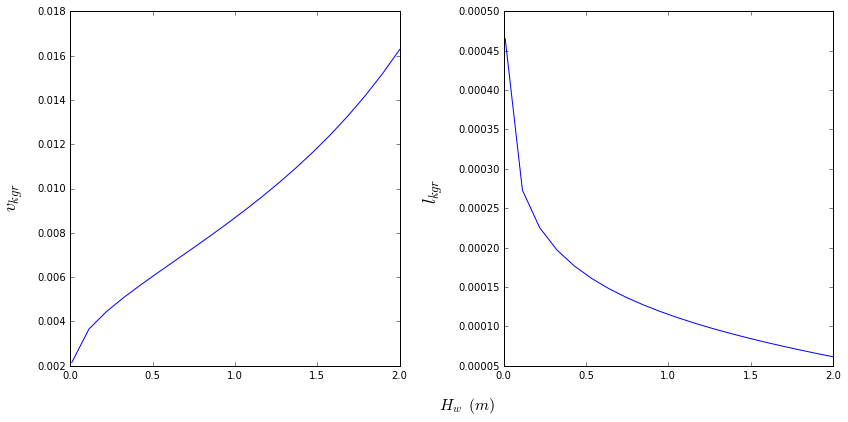

In [64]:
plt.figure(figsize=(12, 6))  # make the drawing area a bit bigger

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

wave_heights = np.linspace(0.01, 2.0, 20)
dissipation_rates = dissipation_rate_with_wave_height(wave_heights)

x = wave_heights
y_ksv = kolmogorov_scale_velocity(dissipation_rates)
y_kls = kolmogorov_length_scale(dissipation_rates)

ax1.plot(x, y_ksv, linewidth=1)
ax2.plot(x, y_kls, linewidth=1)

ax1.figure.text(0.5, 0.0, r'$H_w \,\,\, (m)$', fontsize=16)

ax1.figure.text(0.0, 0.5, r'$v_{kgr}$', fontsize=18, rotation=90)
ax2.figure.text(0.48, 0.5, r'$l_{kgr}$', fontsize=18, rotation=90)

plt.tight_layout(pad=3.0, w_pad=5.0)
show()

Recent research by Zeinstra-Helfrich et al. (2015) show that Sauter mean dispersed droplet size $\delta_{str}$ depends upon the inital oil thickness $\delta_{th}$.

$$
\begin{align}
\alpha_{disp} &= \text{empirical constant from Zeinstra-Helfrich } (> 0) \cr
\beta_{disp} &= \text{empirical constant from Zeinstra-Helfrich } (> 0) \cr
\cr
\delta_{str} &= \alpha_{disp} \cdot \delta_{th} + \beta_{disp}
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \boldsymbol{(1.10)} \cr
\end{align}
$$

The newest SINTEF model (Johansen et al., 2015) also adjusts droplet size according to surface oil thickness, unless the exponent, $a$, in their modified Weber number approach is set to 1 (see their Eq. 9).  They recommend that $a = 0.6$.

However, droplet size also varies based upon breaking wave height.  The slick thickness dependency vanishes for wave heights above 30 cm, based on Zeinstra-Helfrich et al. (2015, Table 3 data).  This corresponds to $U_{10} = 3.7 m/s$, the cutoff wind speed for any dispersion in Adios2.  Hence $\alpha_{disp}$ will be at best a minor correction for low wind speeds and is not included in the model at this time, nor is surface slick thickness used as a parameter in the model.  An alternative reference length is the Kolmogorov length scale.

$$
\begin{align}
d &= \frac{\delta_{str}}{l_{kgr}}
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \boldsymbol{(1.11)} \cr
\end{align}
$$

## <u>Calculating the Droplet Size Distribution</u>

Various factors contribute or retard the breaking of oil into droplets.  As the turbulence from the breaking wave cascades to smaller eddy scales, the turbulent energy dissipation encourages droplet breakup while oil-water surface tension resists breakup.  At a certain eddy scale, viscous forces within the droplet become the major retarding force.

However, experiments by Zhou & Kresta (1998) show no relationship between droplet size and Kolmogorov length scale.  This leaves wave height $H_w$ as a remaining length scale choice.

<center>
-------- surface tension -------><br>
<----- energy dissipation ------<br>
--------- droplet size ----------><br>
====== inertial-viscous limit ======<br>
-------- viscous forces --------><br>
</center>

The DS formulas have the well recognized limitation of droplet size independence from the oil-water surface tension while actual laboratory and field studies indicate such dependence exists.  Inertial force breakup of droplets depends upon the Weber number, $W_e$, while breakup at the viscous range limit are better characterized by the Reynolds number, $R_e$.  Numerous functional fits have been suggested to match droplet size to Weber number modified by Reynolds number or some other dimensionless number dependent on viscosity (Singh et al., 2008; Johansen et al., 2013; Lehr et al., AMOP; Boxall et al., 2011; Johansen et al., 2015).

Adios3 modifies the traditional Weber-based approach by incorporating the experimental results of DS.  Defined properties for this approach are:

$$
\begin{align}
\sigma_{ow} &= \text{oil-water surface tension} \cr
\rho_w, \rho_{oil} &= \text{density of water and oil, respectively} \cr
\nu_w, \nu_{oil}  &= \text{kinematic viscosity of water and oil, respectively} \cr
\end{align}
$$

According to Lasheras et al. (2002), balancing confining stresses with turbulent stresses yields a critical diameter, $\delta_c$, where smaller particles are assumed stable.

$$
\begin{align}
A &= \text{an empirical constant} \cr
\cr
\delta_c &= A \cdot \left( \frac{\sigma_{o-w}}{\rho_w} \right)^{3/5} \cdot \frac{1}{\varepsilon^{2/5}}
\qquad \qquad \qquad \qquad \qquad \qquad \boldsymbol{(1.12)} \cr
\end{align}
$$

DS, on the other hand, presumes that the average droplet size is given by (Dunnewind, 2003):

$$
\begin{align}
C &= \text{an empirical constant} \cr
\cr
\delta_{avg} &= C \cdot \frac{\nu_{oil}^{1/3}}{\varepsilon^{1/2}}
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \boldsymbol{(1.13)} \cr
\end{align}
$$

Recognizing the empirical nature of DS, and the claim by Sprow (1967) that the mean and maximum droplet diameter are related, Adios3 combines the two equations to assume that:

$$
\begin{align}
\alpha &= \text{a dimensionless constant} \cr
\cr
d &= \frac{\delta_{str}}{H_w} \cr
&= \alpha \left( \frac{\nu_{oil}}{\nu_w} \right)^{1/3} \cdot \left( \frac{\sigma_{ow}}{\rho_w} \right)^{3/5} \cdot \frac{1}{H_w \cdot \varepsilon^{2/5}}
\qquad \qquad \qquad \qquad \qquad \boldsymbol{(1.14)} \cr
\end{align}
$$

This deviates slightly from Johansen (2015), based on Singh et al. (2008) and Wang & Calabrese (1986), where the average (dimensionless) diameter is:

$$
\begin{align}
a &= \text{dimensionless empirical fit constant} \cr
b &= \text{dimensionless empirical fit constant} \cr
\cr
d &= \text{average (dimensionless) diameter} \cr
&= \left({1 + b \cdot \frac{W_e}{R_e} \cdot d^{1/3} \over a \cdot W_e} \right)^{3/5} \cr
&= \left({1 + b \cdot \frac{\zeta_{we}}{\zeta_{re}} \cdot d^{1/3} \over a \cdot \zeta_{we} \cdot d} \right)^{3/5}
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \boldsymbol{(1.15)} \cr
\end{align}
$$

For low viscosity oils, droplet size is only a function of the Weber number (Hinze, 1955).  Higher viscosity oils show droplet size dependence on viscosity, matching the conclusions of DS.

Using the data sets of Johansen et al. (2016) and Li & Katz (2016) the following table can be constructed (note that the values for energy dissipation may be different than reported in the literature due to differences in definition).

|oil   | $\varepsilon (\cdot 10^4) \qquad$ | $\nu_{oil} (\cdot 10^6) \qquad$ | $ \sigma_{ow} (\cdot 10^3) \qquad$ | $H_w$ | $\delta_{str} (\cdot 10^3) \qquad$ | $\alpha$ |
| --- | --- | --- | --- |
|Troll       | 1.6  | 1.52  | 13 | 0.1  | 0.39 | 0.0087 |
|Troll       | 3.45 | 2.78  | 13 | 0.2  | 0.43 | 0.011  |
|Troll       | 5.93 | 1.83  | 14 | 0.3  | 0.44 | 0.015  |
|Troll       | 5.93 | 4.57  | 14 | 0.3  | 0.39 | 0.0098 |
|Troll       | 1.6  | 1.76  | 13 | 0.1  | 0.34 | 0.0073 |
|Troll       | 1.6  | 2.6   | 13 | 0.1  | 0.43 | 0.0081 |
|Troll       | 1.6  | 5.9   | 14 | 0.1  | 0.49 | 0.0067 |
|Troll       | 1.6  | 1.85  | 13 | 0.1  | 0.5  | 0.011  |
|North Slope | 1.6  | 1.77  | 25 | 0.1  | 0.51 | 0.0074 |
|Norne       | 3.45 | 2.46  | 10 | 0.2  | 0.25 | 0.0076 |
|crude(JHU)  | 5.65 | 9.4   | 19 | 0.29 | 0.32 | 0.0052 |
|crude(JHU)  | 4.6  | 9.4   | 19 | 0.25 | 0.31 | 0.0046 |
|crude(JHU)  | 3.89 | 9.4   | 19 | 0.22 | 0.33 | 0.0046 |

This yields an average value for $\alpha$ of 0.0082.

Calculating the log normal distributions have proved useful to describe particle distributions in colloidal theory (Limpert et al., 2001).  Li & Katz (2016) droplet measurements also show log normal type droplet distributions as well.  For example, this is the cumulative volume fraction distribution for run 23 of their experiments:

<center><i>(figure from Li & Katz)</i></center>

Adios3 however, follows the choice of Johansen et al. (2013) in using the similar, but computationally easier Rosin-Rammler (RR) distribution.

$$
\begin{align}
d &= \text{droplet diameter} \cr
&= \frac{\delta}{\delta_{str}} \cr
\lambda &= \text{scale parameter} \cr
k &= \text{shape parameter} \cr
\cr
F_{vol}(d) &= \text{the cumulative dispersed oil volume for droplet} \cr
&= 1 - exp(-1 / \lambda \cdot (d)^k)
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \boldsymbol{(1.16)} \cr
\end{align}
$$

The following table shows the values for the scale and shape parameters for the SINTEF and Johns Hopkins (JHU) data.  Adios3 will use the JHU results.

| | JHU | SINTEF |
| --- | --- |
|scale       | $\frac{1}{0.4}$ | $\frac{1}{0.69}$ |
|shape       | 2.35  | 1.8    |


## <u>References</u>

<ul>
    <li>Boxall, J., C. Koh, E. Sloan, A. Sum, and D. Wu (2011): Droplet Size Scaling of Water-in-oil Emulsions Under Turbulent Flow, <i><b>Langmuir 28:104-110</b></i></li>
    <li>Craig, P. and M. Banner (1994): Modeling Wave-enhanced Turbulence in the Ocean Surface Layer, <i><b>J. of Phys. Ocean, 24:2546-2559</b></i></li>
    <li>Delvigne, G. A. L. and Sweeney, C. E. (1998): Natural Dispersion of Oil, <i><b>Oil Chem. Pollution 4:281-310</b></i></li>
    <li>Ding, L. and D. Farmer (1993): Observation of Breaking Surface Wave Statistics, <i><b>J. of Phys. Ocean 24:1368-1387</b></i></li>
    <li>Hinze, J. (1955): Fundamentals of Hydrodynamic Mechanism of Splitting in Dispersion Processes, <i><b>AICHE J., 1:289-205</b></i></li>
    <li>Johansen, O., M. Reed, and N. Bodsberg (2015): Natural Dispersion Revisited, <i><b>Mar. Poll. Bull., 93:20-26</b></i></li>
    <li>Lehr, W. and D. Simecek-Beatty (2000): The Relation of Langmuir Circulation Processes to the Standard Oil Spill Spreading, Dispersion, and Transport Algorithms, <i><b>Spill Sci. and Tech., 6:247-253</b></i></li>
    <li>Li, M. and C. Garrett (1998): The Relationship Between Oil Droplet Size and Upper Ocean Turbulence, <i><b>Mar. Poll. Bull., 36:961-970</b></i></li>
    <li>Gemmrich, J. and D. Farmer (2004): Near Surface Turbulence in the Presence of Breaking Waves, <i><b>J. of Phys. Ocean, 34: 1067-1086</b></i></li>
    <li>Melville, W. (1994): Energy Dissipation by Breaking Waves, <i><b>J. of Phys. Ocean, 24:2041-2049</b></i></li>
    <li>Parsa, R., M. Kolahdoozan, and M. Moghaddam (2016): Vertical Oil Dispersion Profile Under Non-breaking Regular Waves, <i><b>Environ. Fluid Mech., 16:833-844</b></i></li>
    <li>Rapp, R. and W. Melville (1990): Laboratory Measurements of Deep-water Breaking Waves, <i><b>Philos. Transactions of Roy. Soc. London A, 331:735-800</b></i></li>
    <li>Shore Protection Manual (1984, 4th ed.), Army Engineer Waterways Experimental Station, U. S. Government Printing Office, Washington, DC</li>
    <li>Singh, K., S. Mahajani, K. Shenoy, S. Ghosh (2008): Representative Drop Sizes and Drop Size Distributions in A/O Dispersions in Continuous Flow Stirred Tank, <i><b>Hydro-metallurgy 90:121-136</b></i></li>
    <li>Sprow, F. (1967): Distribution of Drop Sizes Produced in Turbulent Liquid-liquid Dispersion, <i><b>Chem. Eng. Sci., 22:435-442</b></i></li>
    <li>Sutherland, G., B. Ward, and K. Christensen (2013): Wave-turbulence Scaling in the Ocean Mixed Layer, <i><b>Ocean Sci., 9:597-608</b></i></li>
    <li>Terry, E., M. Donelan, M. Agraval, Y. Drennan, W. Kahma, K. Williams, P. Hwang, S. Kitaigorodskii (1996): Estimates of Kinetic Energy Dissipaton Under Breaking Waves, <i><b>J. Phys. Ocean, 26:792-807</b></i></li>
    <li>Umlauf, L. and H. Burchard (2003): A Generic Length-scale Equation for Geophysical Turbulence Models, <i><b>J. Mar. Res., 6(2):236-265 </b></i></li>
    <li>Wang, B. and Q. Liao (2016): Field Observation of Turbulent Dissipation Rate Profiles Immediately Below the Air-water Interface, <i><b>J. Geophys. Res. Oceans, 121:4377-4391</b></i></li>
    <li>Zhao, D. and S. Kresta (1998): Correlation of Mean Drop Size with Turbulence Energy Dissipation and the Flow in an Agitated Tank, <i><b>Chem. Eng. Sci., 53:2063-2079</b></i></li>
    <li>Zhao, D. and Y. Toba (2001): Dependence of Whitecap Coverage on Wind and Wind-wave Properties, <i><b>J. of Phys. Ocean, 57:603-616</b></i></li>
    <li>Zeinstra-Helfrich (2015): <i><b>?????????</b></i></li>
</ul>

## <u>Notes</u>